### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data
https://www.kaggle.com/datasets/surajjha101/cuisine-rating

---
##### Data Dictionary

    User ID - User ID of customers
    Area code - Area code of customers residence
    Location - Area and the city of residence of customers
    Gender - Gender of customer
    YOB - Year when customer was born
    Marital Status - Marital status
    Activity - Customers career status whether student or professional
    Budget - Budget they may spend in the restaurant
    Cuisines - Cuisine they preferred/liked the most to have at restaurant
    Alcohol - Alcohol intake frequency
    Food Rating - Rating they gave to restaurant's food
    Service Rating - Rating they gave to restaurant's service
    Overall Rating - Mean rating calculated from food and service ratings
    Often A S - Often they visited restaurant or not
---

In [2]:
df = pd.read_csv("..\\..\\DATA\\kaggle\\cuisine_rating.csv")
df.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


## Exploratory Data Analysis and Visualisations

#### Basic Exploration

In [3]:
df.shape

(200, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


#### Missing values

In [5]:
df.isnull().sum()

User ID           0
Area code         0
Location          0
Gender            0
YOB               0
Marital Status    0
Activity          0
Budget            0
Cuisines          0
Alcohol           0
Smoker            0
Food Rating       0
Service Rating    0
Overall Rating    0
Often A S         0
dtype: int64

#### Duplicates

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
# Dropping 'User ID' column
# It's not neccessary for further analysis purpouses, cause there are no duplicates
df = df.drop('User ID', axis=1)
df.head()

,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


In [8]:
df.shape

(200, 14)

#### First data preparation in EDA

##### Checking if 'Area code' has the same unique values as 'Location' (checking if they are representing the same info)

In [9]:
len(df['Area code'].unique())

65

In [10]:
len(df['Location'].unique())

10

They are not the same, so more codes reffer to the same location in this dataset.

##### Adding 'Age' column based by year of 'YOB', cause it's easier to interprate results on age

In [11]:
from datetime import datetime
current_year = datetime.now().year
df['Age'] = current_year - df['YOB']
df.head()

,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S,Age
0,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No,19
1,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No,34
2,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes,48
3,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No,69
4,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No,28


#### Statistical analysis

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Area code,200.0,141.060,26.130257,101.0,123.0,135.0,158.0,199.0
YOB,200.0,1984.830,16.809339,1955.0,1971.0,1987.0,2000.0,2009.0
Budget,200.0,3.815,1.056578,1.0,3.0,4.0,5.0,5.0
Food Rating,200.0,3.220,1.411226,1.0,2.0,3.0,5.0,5.0
Service Rating,200.0,3.230,1.526022,1.0,2.0,3.0,5.0,5.0
Overall Rating,200.0,3.225,1.079445,1.0,2.5,3.0,4.0,5.0
Age,200.0,40.170,16.809339,16.0,25.0,38.0,54.0,70.0


In [13]:
df.describe(include='object').transpose()

,count,unique,top,freq
Location,200,10,"St. George,NY",46
Gender,200,2,Male,118
Marital Status,200,3,Single,100
Activity,200,2,Student,120
Cuisines,200,7,Japanese,36
Alcohol,200,3,Never,88
Smoker,200,3,Socially,71
Often A S,200,2,No,174


In [14]:
# Finding correlation
df.corr(numeric_only=True).unstack().drop_duplicates().sort_values()

YOB             Age              -1.000000
Budget          Service Rating   -0.135542
YOB             Budget           -0.071383
Area code       YOB              -0.065006
Budget          Overall Rating   -0.058049
Overall Rating  Age              -0.057508
Area code       Budget           -0.046191
Service Rating  Age              -0.043651
Food Rating     Age              -0.040774
Area code       Service Rating   -0.011942
                Overall Rating   -0.008142
                Food Rating       0.000458
YOB             Food Rating       0.040774
                Service Rating    0.043651
                Overall Rating    0.057508
Budget          Food Rating       0.057764
Area code       Age               0.065006
Budget          Age               0.071383
Food Rating     Service Rating    0.079056
                Overall Rating    0.709562
Service Rating  Overall Rating    0.758532
Area code       Area code         1.000000
dtype: float64

In [15]:
# Finding correlation between all features
df_dummies = pd.get_dummies(df, drop_first=True)
unique_dummies_corr = df_dummies.corr().unstack().drop_duplicates().sort_values()
unique_dummies_corr[(-0.2 > unique_dummies_corr) | (unique_dummies_corr > 0.2) ]

YOB                       Age                           -1.000000
Marital Status_Married    Marital Status_Single         -0.868554
Smoker_Often              Smoker_Socially               -0.544392
Age                       Marital Status_Single         -0.490837
YOB                       Marital Status_Married        -0.438124
Alcohol _Often            Alcohol _Socially             -0.387569
Food Rating               Marital Status_Married        -0.322278
Smoker_Socially           Often A S_Yes                 -0.286778
Food Rating               Smoker_Socially               -0.286669
Overall Rating            Marital Status_Married        -0.284672
Budget                    Location_Market City, MY      -0.268440
Age                       Activity_Student              -0.265636
Location_Central Park,NY  Marital Status_Married        -0.258577
Location_Central Park,ny  Activity_Student              -0.250000
Location_St. George,NY    Location_Upper East Side,NY   -0.229591
Alcohol _S

##### Conclusions
From the above results, it can be seen that there are high correlations between:
- Food Rating and Overall Rating,
- Service Rating and Overall Rating.
  
Which, of course, makes sense, since the food or service rating affects the final restaurant rating.\

---
It can also be seen that there is a high correlation between:
- Alcohol often and often in restaurant,
- Smoker often and often in restaurant

Which indicates that smokers and people who match alcohol with food are more likely to frequent restaurants

---
Interestingly, food ratings and overall ratings do not have such a high correlation with frequent restaurant visits.

---
One can obviously see high correlations between year of birth and martial status, while this is not a matter of interest when analyzing restaurant performances.

### Visualisation

#### Features correlation

<Axes: >

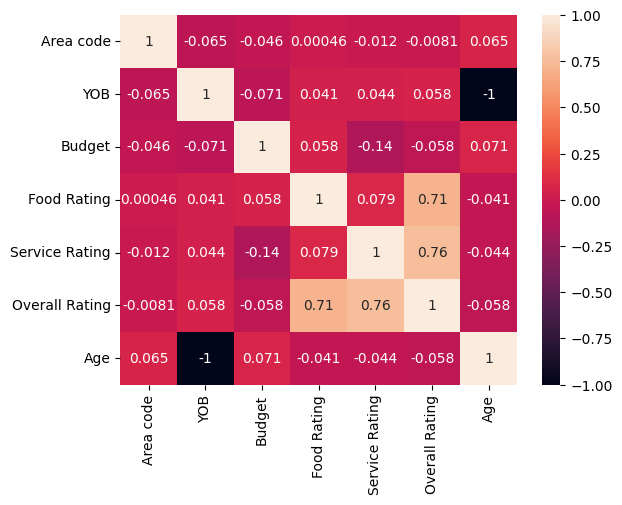

In [16]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

##### Conclusions
The correlation chart above shows only the correlation between numerical values. For obvious reasons, there is a perfect correlation between the year of birth and the age of the client, but it is not of interest in this analysis.

#### Checking outliers for numeric values

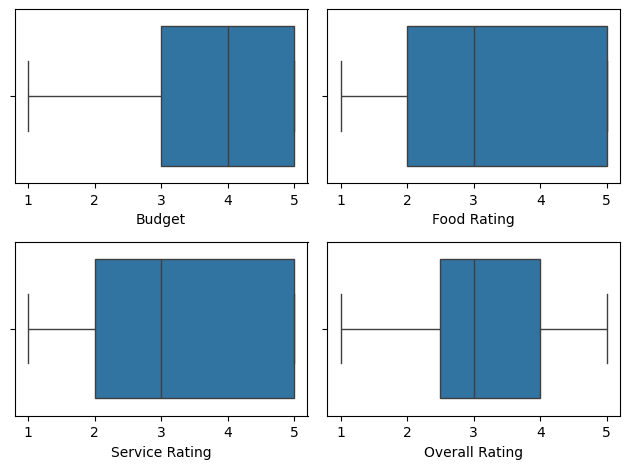

In [17]:
fig, axes = plt.subplots(2,2)
sns.boxplot(data=df, x='Budget', ax=axes[0][0])
sns.boxplot(data=df, x='Food Rating', ax=axes[0][1])
sns.boxplot(data=df, x='Service Rating', ax=axes[1][0])
sns.boxplot(data=df, x='Overall Rating', ax=axes[1][1])
plt.tight_layout()

##### Conclusions
**Budget:** The median is close to 4, which means that most customers have a relatively high budget. No outliers found.\
**Food Rating:** The media at 3-4 means that most of the food has average or good ratings. No outliers - most ratings fall within the full range (1-5).\
**Service Rating:**: Median at 3, suggesting average service quality. No outliers - most ratings fall within the full range (1-5).\
**Overall Rating:** The median close to 3.5, which means that most customers rate the restaurant well, but not sensationally. There are no outliers, suggesting that overall ratings are stable.

#### Distributon of clients age

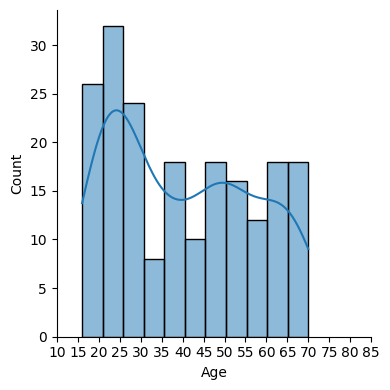

In [18]:
sns.displot(data=df, x='Age', bins=11, kde=True, height=4)
plt.xticks(np.arange(10, 90, 5)) 
plt.tight_layout()

##### Conclusions
1. The largest number of customers are young people in the <15-30> age range.
2. The next target customer groups are in the <60-70>, <45-55> and <35-40> age ranges.

#### Food ratings by the type of cuisine

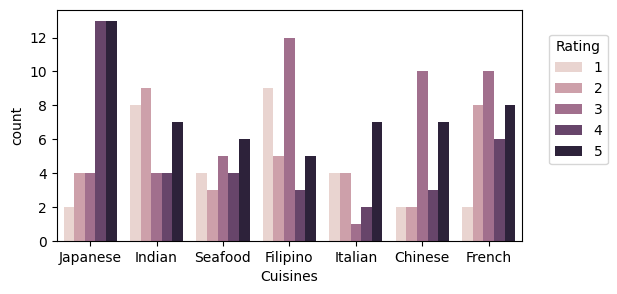

In [19]:
# Comparison of number of ratings by type of cuisine
plt.figure(figsize=(6,3))
sns.countplot(data=df, x='Cuisines', hue='Food Rating')
plt.legend(bbox_to_anchor=(1.2, 0.3), loc=4, title='Rating')

<Axes: xlabel='Cuisines', ylabel='Food Rating'>

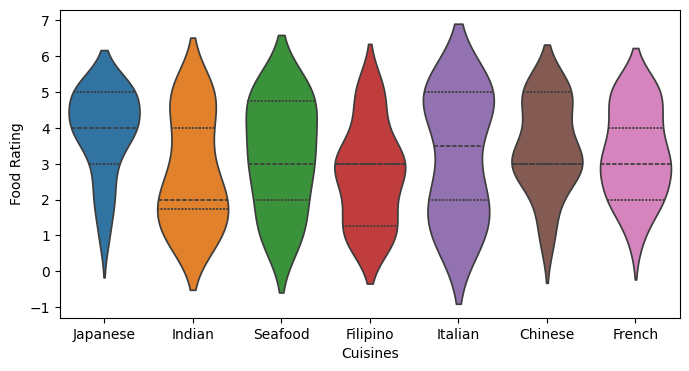

In [20]:
# Comparison of ratings by the type of cuisine
plt.figure(figsize=(8,4))
sns.violinplot(data=df, x='Cuisines', y='Food Rating', hue='Cuisines', inner='quartile')

In [21]:
mean_food_rating = df.groupby('Cuisines')['Food Rating'].mean().reset_index().sort_values(by='Food Rating')
mean_food_rating

,Cuisines,Food Rating
1,Filipino,2.705882
3,Indian,2.781250
4,Italian,3.222222
6,Seafood,3.227273
2,French,3.294118
0,Chinese,3.458333
5,Japanese,3.861111


Text(0.5, 1.0, 'Average cusine rating')

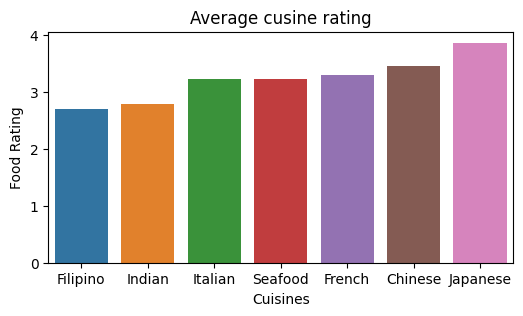

In [22]:
# Average cusine rating
plt.figure(figsize=(6,3))
sns.barplot(data=mean_food_rating, x='Cuisines', y='Food Rating', hue='Cuisines')
plt.title('Average cusine rating')

##### Conclusions
1. From the charts above, it is clear that Japanese cuisine has the most top reviews and is the best rated overall.
2. Chinese, French, Italian and Seafood cuisines have very similar average ratings, but their distribution of ratings differs. 
    - French cuisine has a roughly evenly distributed number of reviews for each type of rating
    - Chinese Cuisine has the most average ratings, with a trend toward higher ratings.
    - Italian Cuisine has the most top ratings, but also has quite a few balancing this good opinion with low ratings.
    - Seafood cuisne has a linear, balanced distribution of ratings - most best ratings, but slightly fewer worst ratings
3. Indian and Filipino cuisine received the worst ratings. And although the average rating is the lowest for Filipino cuisine from the distribution of ratings, however, it can be inferred that it is Indian cuisine that garners the most worst ratings

#### Female vs male customers

<Axes: xlabel='Gender', ylabel='count'>

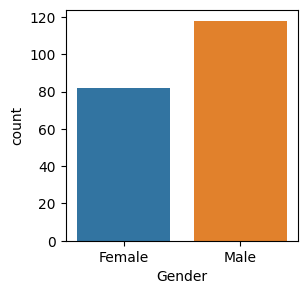

In [23]:
plt.figure(figsize=(3,3))
sns.countplot(data=df, x='Gender', hue='Gender')

##### Conclusions

#### Types of cuisines ordered sorted by customer gender

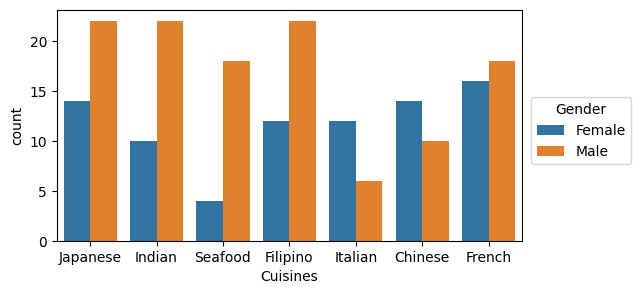

In [24]:
plt.figure(figsize=(6,3))
sns.countplot(data=df, x='Cuisines', hue='Gender')
plt.legend(bbox_to_anchor=(1.25, 0.3), loc=4, title='Gender')

##### Conclusions

#### Budget sorted by customer age and gender

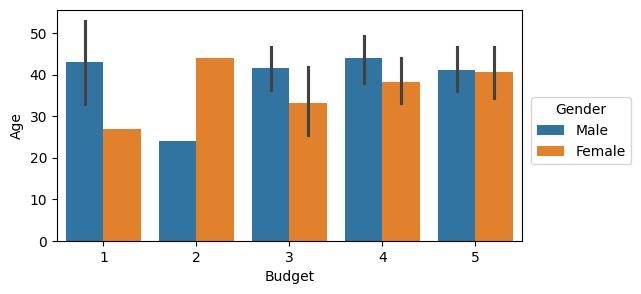

In [25]:
# Comparison of clients budget sorted by age
plt.figure(figsize=(6,3))
sns.barplot(data=df, x='Budget', y='Age', hue='Gender')
plt.legend(bbox_to_anchor=(1.25, 0.3), loc=4, title='Gender')

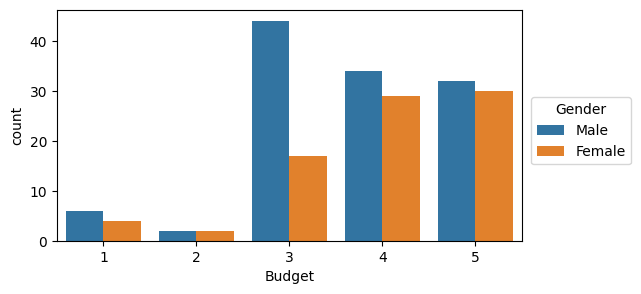

In [26]:
# Comparison of clients budget sorted by gender
plt.figure(figsize=(6,3))
sns.countplot(data=df, x='Budget', hue='Gender')
plt.legend(bbox_to_anchor=(1.25, 0.3), loc=4, title='Gender')

##### Conclusions
- Most customers have a relatively high budget (in compliance to the boxplot considered earlier).
- Most women have a budget of 3, but also a lot of women have a budget of 4-5. Meanwhile, men are willing to spend more and their budget is usually 4-5.
- Those with a budget of:
    - 1: are men of basically any age and women of ~25 years of age.
    - 2: are overwhelmingly women in their 40s and men around 20.
    - 3: are women whose ages vary widely, and are men, whose age also varies, while the standard deviation in this case is not as large as for women.
    - 4 & 5: regardless of gender, the average age is about 40, while a slight standard deviation is apparent

#### Frequency of restaurant visits sorted by customer gender

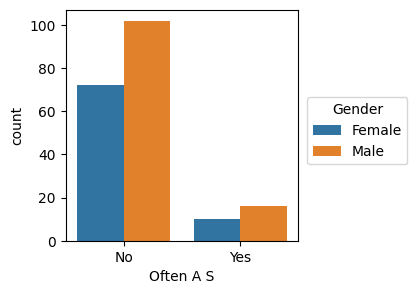

In [27]:
plt.figure(figsize=(3,3))
sns.countplot(data=df, x='Often A S', hue='Gender')
plt.legend(bbox_to_anchor=(1.5, 0.3), loc=4, title='Gender')

##### Conclusions
Most customers, regardless of gender, are not frequent visitors to this restaurant.

#### Place of residence of customers

In [28]:
location_counts = df['Location'].value_counts().reset_index()
location_counts.columns = ['Location', 'Count']

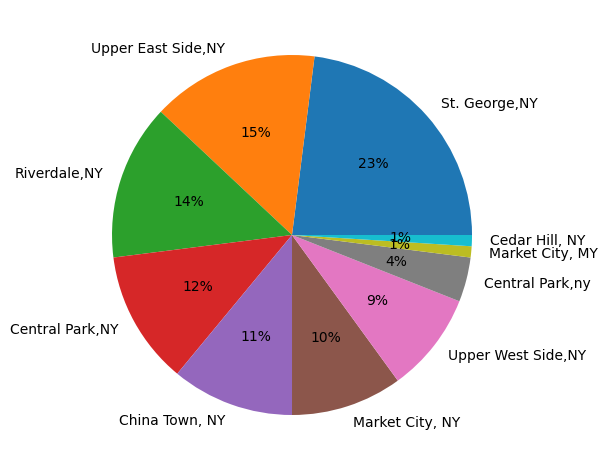

In [29]:
plt.pie(x=location_counts['Count'], labels=location_counts['Location'].unique(), autopct='%.0f%%') 
plt.tight_layout()

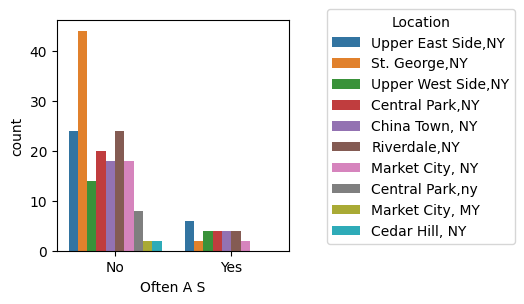

In [30]:
# Frequency of restaurant visits sorted by customer place of residence
plt.figure(figsize=(3,3))
sns.countplot(data=df, x='Often A S', hue='Location')
plt.legend(bbox_to_anchor=(2, 0), loc=4, title='Location')

##### Conclusions
Customers' place of residence does not have much influence on the frequency of visiting this restaurant.

### Final Conclusions
1. There is a very high correlation between food and service ratings and overall restaurant ratings. This suggests that improving the quality of food and service should be a key goal of restaurateurs.
2. Frequency of visits is related to habits, not restaurant ratings. People who consume alcohol and smoke cigarettes are more likely to visit restaurants. Surprisingly, the overall rating of a restaurant does not have such a strong effect on the frequency of visits, which means that customer loyalty may depend more on lifestyle than on the quality of the restaurant itself.
3. Although the “St. George, NY” neighborhood was the most common location, which may suggest a higher concentration of customers, this still did not carry over into the result of more frequent restaurant visits by these individuals.
4. Japanese cuisine is the best rated overall and Indian cuisine has the worst ratings.